# MLP - multilayer perceptron regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from pathlib import Path

In [2]:
path_data = Path(r'../../../../Input_data/')

## Importing the dataset

In [3]:
dataset = pd.read_csv(path_data / 'ML_SSM_dataset_v1_20220317/ML_training&testing_v01shuffled_20220317.csv')
dataset.head()

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Soil Moisture
0,2015,222,0.120117,-0.002280,29.12,31.14,0.183740,11.589293,23.996123,8.695007,19.700001,1752.627563,40.078119,-112.361396,3.56868,0.490566,37.700001,42.700001,0.000853,0.092000
1,2010,177,0.515586,-0.004072,19.55,8.68,0.685505,14.058996,21.684099,14.624732,22.799999,153.939468,48.726702,3.203102,6.65464,0.509434,10.400000,66.800003,0.000849,0.001500
2,2012,79,0.238310,-0.002077,8.04,10.50,0.410580,14.444198,8.660008,4.510628,23.799999,73.877228,43.717169,3.857831,6.98220,0.490566,29.799999,46.400002,0.321031,0.123435
3,2013,95,0.188224,-0.002522,12.32,29.50,0.352700,15.731341,7.477071,13.977669,31.600000,213.627564,40.052801,-88.372904,6.39604,0.471698,8.800000,59.599998,0.000435,0.394130
4,2007,299,0.435490,-0.001802,8.66,7.38,0.882154,12.428805,7.207212,52.144912,40.299999,192.723587,45.249999,-123.280000,16.34352,0.539623,15.800000,43.799999,0.001720,0.387500


In [4]:
dataset.shape

(469434, 20)

## Construction of the matrix of characteristics (X) and the dependent variable vector (y)

In [5]:
X = dataset.iloc[:, :-1].values #all columns, but the last
y = dataset.iloc[:, -1].values #only the last column

## Division of the dataset into the Training Set and the Test Set
- Obs: "random_state = 0" to ensure the training and testing sets are the same each time we train the model. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Very important: Feature scaling of X (z-transformation => mean = 0, std=1)

### Obs: Fit_transform only applied to X_train to prevent data leaking

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape

(117359, 19)

In [8]:
np.concatenate((X_train, X_test)).std(), np.concatenate((X_train, X_test)).mean()

(1.0007581037794264, -2.6934007929017374e-05)

# Loading (or training) the estimator

training takes long

In [9]:
with open('../models/grid_search_30_30.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [10]:
regressor = loaded_model.best_estimator_
regressor

MLPRegressor(activation='tanh', alpha=1e-06, hidden_layer_sizes=(30, 30),
             learning_rate='adaptive', max_iter=1000, random_state=0,
             tol=1e-07)

In [26]:
%%time
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(random_state=0,
                         hidden_layer_sizes=(30, 30), 
                         activation = 'tanh', 
                         solver = 'adam', 
                         learning_rate = 'adaptive', 
                         max_iter=1000, 
                         early_stopping=False, 
                         alpha=1e-6,
                         tol=1e-7
                        ) 
regressor.fit(X_train, y_train)

CPU times: user 5min 37s, sys: 0 ns, total: 5min 37s
Wall time: 5min 37s


MLPRegressor(activation='tanh', alpha=1e-06, hidden_layer_sizes=(30, 30),
             learning_rate='adaptive', max_iter=1000, random_state=0,
             tol=1e-07)

# Test random

In [11]:
X_test.shape

(117359, 19)

In [27]:
y_pred = regressor.predict(X_test) 

In [13]:
y_pred = regressor.predict(X_test) 
r2score= r2_score(y_test, y_pred)
print('R2score is',r2score )
MAE=mean_absolute_error(y_test, y_pred)
print('MAE is',MAE)
MSE=mean_squared_error(y_test, y_pred)
print('MSE is',MSE)
print('RMSE is', np.sqrt(MSE))

R2score is 0.7605064665461319
MAE is 0.04051787836204839
MSE is 0.0029786814603377262
RMSE is 0.05457729803075383


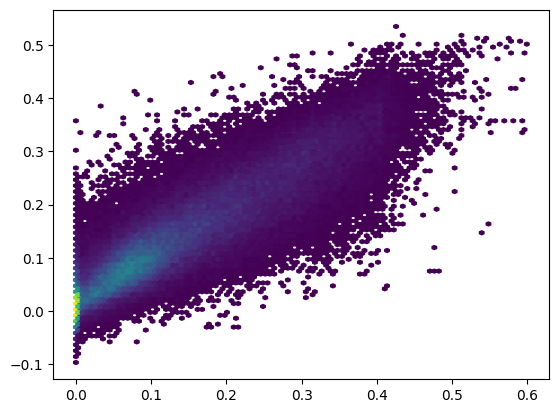

In [14]:
plt.hexbin(y_test, y_pred, mincnt=1)

# Test temporal

In [15]:
dataset_val = pd.read_csv(path_data / 'ML_SSM_dataset_v1_20220317/ML_validating_v01_20220303.csv')
dataset_val.head()

,station,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,...,ESA-CCI,lat,lon,network,OMC,Porosity,Sand,Silt,Soil Moisture,Preci
0,SAA111,0.267585,-0.002658,13.80,5.34,0.503435,9.724592,10.782256,42.469012,9.4,...,0.256715,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.175417,0.121573
1,SAA111,0.264823,-0.003970,22.36,13.26,0.497070,9.724592,15.129432,38.514693,9.4,...,0.258126,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.172500,0.001892
2,SAA111,0.256537,-0.003107,18.15,11.12,0.477974,9.724592,16.073048,41.956012,9.4,...,0.287426,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.179500,6.832266
3,SAA111,0.220529,-0.003018,10.73,-11.00,0.403011,9.724592,14.346681,41.557064,9.4,...,0.254694,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.179375,0.021294
4,SAA111,0.213499,-0.003174,14.76,5.98,0.396828,9.724592,14.414658,42.532913,9.4,...,0.243986,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.176958,0.166529


In [16]:
dataset2=pd.to_datetime(dataset_val['Date']) #move the datetime column to a new DF, and convert it to a recognized panda type 
DOY=dataset2.dt.dayofyear #create a Series "day", where the day of the year is stored
#also allows for weekofyear
Year= dataset2.dt.year #create a "year series"
dataset_val.insert(0, 'DOY', DOY) #insert the day series to the beggining of the dataset
dataset_val.insert(0, 'Year', Year)#insert the year series to the beggining of the dataset
dataset_val.drop(labels=['Date'], axis=1,inplace = True) #eliminate the date column

In [17]:
Xy = dataset_val[dataset.columns]
Xy.shape

(199886, 20)

In [18]:
X = Xy.iloc[:, :-1].values #all columns, but the last
y_val = Xy.iloc[:, -1].values #only the last column
X_val = sc.transform(X)

In [19]:
%%time
y_val_pred = regressor.predict(X_val)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score= r2_score(y_val, y_val_pred)
print('R2score is',r2score )
MAE=mean_absolute_error(y_val, y_val_pred)
print('MAE is',MAE)
MSE=mean_squared_error(y_val, y_val_pred)
print('MSE is',MSE)
print('RMSE is', np.sqrt(MSE))
r=np.corrcoef(y_val, y_val_pred)[0, 1]
print(f'r={r}')

R2score is 0.6549714441696547
MAE is 0.048288808806442055
MSE is 0.004301095916586409
RMSE is 0.06558274099628963
r=0.8132595882870146
CPU times: user 978 ms, sys: 1.04 s, total: 2.02 s
Wall time: 284 ms


# Test independent stations

In [20]:
path = Path(path_data / 'ML_SSM_dataset_v1_20220317/output')
# dir_out_ind = Path(r'../Input_data/ML_SSM_dataset_v1_20220317/output')

Xys = []
df_out = []

for csv_path in path.glob('*.csv'):
    print('.', end='')
    df = pd.read_csv(csv_path)
    dataset2 = pd.to_datetime(df['Date']) #move the datetime column to a new DF, and convert it to a recognized panda type 
    DOY = dataset2.dt.dayofyear #create a Series "day", where the day of the year is stored
    #also allows for weekofyear
    Year = dataset2.dt.year #create a "year series"
    df.insert(0, 'DOY', DOY) #insert the day series to the beggining of the dataset
    df.insert(0, 'Year', Year)#insert the year series to the beggining of the dataset
    df.drop(labels=['Date'], axis=1,inplace = True) #eliminate the date column
    
    if not ('lat' in df.columns):
        df['lat'] = df.Lat
        df['lon'] = df.Lon
    
    Xy_ind = df[dataset.columns]
    Xys.append(Xy_ind)
    
    X = Xy_ind.iloc[:, :-1].values #all columns, but the last
    ys_ind_i = Xy_ind.iloc[:, -1].values #only the last column
    # Xs_ind_i = StandardScaler().fit_transform(X)
    Xs_ind_i = sc.transform(X)
    
    y_pred_i = regressor.predict(Xs_ind_i)
    
    if len(df.station.unique()) != 1:
        raise Exception('multiple sitations?!')
    
    df_i = pd.DataFrame({'observed SSM': ys_ind_i, 'predicted SSM': y_pred_i})
    df_i.index.name = 'ID'
    df_i.index += 1
    # df_i.to_csv(dir_out_ind / csv_path.name)
    df_i.shape
    df_i['station_name'] = csv_path.name
    df_out.append(df_i)
    # break
df_out = pd.concat(df_out)

....................................................................................................................................................

In [21]:
def get_site_stats(row):
    y_test = row['observed SSM']
    y_pred = row['predicted SSM']
    metrics_i = {
        'r2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r': np.corrcoef(y_test, y_pred)[0, 1],
        'n_size': y_test.size
    }
    return pd.Series(metrics_i)

In [22]:
df_out_stat = df_out.groupby('station_name').apply(get_site_stats)

In [23]:
df_out_stat.describe()

,r2,MAE,MSE,RMSE,r,n_size
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,-2.662551,0.074583,0.009219,0.085936,0.592238,446.993243
std,7.868530,0.041486,0.009920,0.042969,0.256480,356.814582
min,-70.699951,0.010688,0.000216,0.014695,-0.479911,5.000000
25%,-2.382084,0.046071,0.003173,0.056332,0.500782,146.750000
50%,-0.351725,0.062200,0.005683,0.075386,0.663430,362.000000
75%,0.237479,0.094783,0.011919,0.109173,0.764522,748.500000
max,0.856927,0.236730,0.056775,0.238275,0.944364,1286.000000


In [24]:
get_site_stats(df_out)

r2            0.152808
MAE           0.078748
MSE           0.010281
RMSE          0.101396
r             0.572409
n_size    66155.000000
dtype: float64